<a href="https://colab.research.google.com/github/s-jainr/deep-learning-sp23/blob/main/Rahul_AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [47]:
from sklearn.model_selection import train_test_split
from urllib.request import urlretrieve
import numpy as np
import seaborn as sns
import pandas as pd

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [48]:
shakespeare = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
fitzgerald = 'https://www.gutenberg.org/cache/epub/64317/pg64317.txt'

urlretrieve(shakespeare, 'shakespeare.txt')
shakespeare = open("shakespeare.txt", encoding='utf-8').read().lower()

urlretrieve(fitzgerald, 'fitzgerald.txt')
fitzgerald = open("fitzgerald.txt", encoding='utf-8').read().lower()

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

<Axes: ylabel='count'>

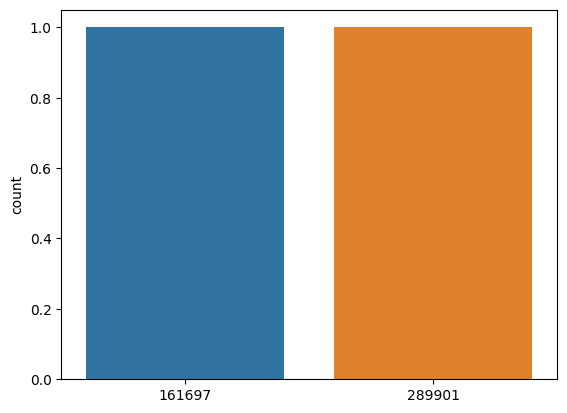

In [49]:
# sns.set_theme(style="whitegrid")
sns.countplot(x=[len(shakespeare), len(fitzgerald)], )

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [50]:
chars = sorted(list(set(shakespeare+fitzgerald)))

print("Unique characters of the books:", len(chars))
print(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print("Indices to char dictionary:", indices_char)

Unique characters of the books: 72
['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'æ', 'ç', 'é', 'ê', 'ô', '\u200a', '—', '‘', '’', '“', '”', '…', '\ufeff']
Indices to char dictionary: {0: '\t', 1: '\n', 2: ' ', 3: '!', 4: '"', 5: '#', 6: '$', 7: '%', 8: '&', 9: "'", 10: '(', 11: ')', 12: '*', 13: ',', 14: '-', 15: '.', 16: '/', 17: '0', 18: '1', 19: '2', 20: '3', 21: '4', 22: '5', 23: '6', 24: '7', 25: '8', 26: '9', 27: ':', 28: ';', 29: '?', 30: '[', 31: ']', 32: '_', 33: 'a', 34: 'b', 35: 'c', 36: 'd', 37: 'e', 38: 'f', 39: 'g', 40: 'h', 41: 'i', 42: 'j', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'p', 49: 'q', 50: 'r', 51: 's', 52: 't', 53: 'u', 54: 'v', 55: 'w', 56: 'x', 57: 'y', 58: 'z', 59: 'æ', 60: 'ç', 61: 'é', 62: 'ê', 63: 

In [51]:
maxlen  = 60
step    = 10   # the step size between two "sentence" is 10 characters
sentences_s = []
sentences_f = []

for i in range(0, len(shakespeare)-maxlen, step):
    sentences_s.append(shakespeare[i:i+maxlen])

for i in range(0, len(fitzgerald)-maxlen, step):
    sentences_f.append(fitzgerald[i:i+maxlen])

sentences = shakespeare + fitzgerald

In [52]:
X_s = np.zeros((len(sentences_s), maxlen, len(chars)))
X_f = np.zeros((len(sentences_f), maxlen, len(chars)))

for i, sentence in enumerate(sentences_s):
    for t, char in enumerate(sentence): 
        X_s[i,t,char_indices[char]] = 1

for i, sentence in enumerate(sentences_f):
    for t, char in enumerate(sentence): 
        X_f[i,t,char_indices[char]] = 1


y_s = np.ones(len(sentences_s))
y_f = np.zeros(len(sentences_f))

print("Shape of the input data:", X_s.shape, X_f.shape)
print("Shape of the target data:", y_s.shape, y_f.shape)

Shape of the input data: (16164, 60, 72) (28985, 60, 72)
Shape of the target data: (16164,) (28985,)


In [71]:
sentences_s[0], sentences_f[0]

('\ufeffthe project gutenberg ebook of romeo and juliet, by william',
 '\ufeffthe project gutenberg ebook of the great gatsby, by f. scot')

In [ ]:
# for i in range(X_f.shape[-1]):
for i in range(X_s.shape[-1]):
  print(X_s[0, :, i])
  if i > 3: break

## Data splitting
Split the data into train, validate and test sets. Make 

In [53]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=47)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=47)

In [54]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_s, y_train_s, test_size=0.2, random_state=47)
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_train_f, y_train_f, test_size=0.2, random_state=47)

In [55]:
X_train = np.append(X_train_s, X_train_f, axis=0)
X_test = np.append(X_test_s, X_test_f, axis=0)
X_val = np.append(X_val_s, X_val_f, axis=0)

y_train = np.append(y_train_s, y_train_f, axis=0)
y_test = np.append(y_test_s, y_test_f, axis=0)
y_val = np.append(y_val_s, y_val_f, axis=0)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


In [57]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[-2], X_train.shape[-1])))
# model.add(Dense(1, activation='sigmoid'))

In [58]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[-2], X_train.shape[-1])))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               102912    
                                                                 
 dense_2 (Dense)             (None, 72)                9288      
                                                                 
 activation_1 (Activation)   (None, 72)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 73        
                                                                 
Total params: 112,273
Trainable params: 112,273
Non-trainable params: 0
_________________________________________________________________


In [60]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
Train the model and apply early stopping.

In [61]:
es = EarlyStopping(patience=5)

In [62]:
network_history = model.fit(X_train, y_train, 
                            validation_data=(X_val,y_val),
                            batch_size=128,                             
                            epochs=1000, 
                            verbose=1, 
                            callbacks=[es])

Epoch 1/1000
226/226 [==============================] - 55s 233ms/step - loss: 0.6533 - val_loss: 0.6527
Epoch 2/1000
 34/226 [===>..........................] - ETA: 38s - loss: 0.6503

KeyboardInterrupt: ignored

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [ ]:
model.evaluate(X_test, y_test)

## Confusion matrix
Calculate and display the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
preds = model.predict(X_test)

In [ ]:
# preds = np.round(preds)

max(preds), min(preds)

In [ ]:
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix, annot=True, fmt='d')